Alvaro David Montero Barraza
Tecnologías de Lenguaje Natural
5BV1
Ingeniería en Inteligencia Artificial

Este programa realiza un análisis exploratorio a un texto, posteriormente se aplican tecnicas de normalización al texto
Y un análisis exploratorio al resultado normalizado

Análisis Exploratorio de texto

Tokens

In [2]:
#Importacion de librerias
import spacy
from collections import Counter

spanish_text=0
with open("spanish.txt","r",encoding="utf-8") as f:
    spanish_text=f.read()
#print(spanish_text)
spanish_text=spanish_text.lower()
nlp=spacy.load('es_core_news_sm')
doc=nlp(spanish_text)

tokens=[token.text for token in doc]
print(tokens)
print("\nNumero total de tokens en el texto: "+str(len(tokens)))


['por', 'lo', 'general', ',', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', '.', 'es', 'un', '\n', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', '\n', 'semánticas', ',', 'como', 'palabras', ',', 'signos', 'o', 'imágenes', '.', 'se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', '\n', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', ',', '\n', 'casi', 'como', 'caminar', '.', 'asimismo', ',', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', ',', 'ya', 'que', 'las', '\n', 'excepciones', 'son', 'innumerables', ',', 'por', 'ejemplo', ':', 'los', 'sustantivos', 'que', 'terminan', 'con', '‘', 'a', '’', 'son', 'femeninos', ',', '\n', 'pero', 'no', 'es', 'el', 'caso', 'del', 'sustantivo', '‘', 'el', 'problema', '‘', '.', 'sin', 'embargo', ','

Tokens únicos

In [3]:
tokens_freq=Counter(tokens) #Contador de frecuencia de tokens

unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]

print(unique_tokens)

print("\nNumero de tokens unicos "+str(len(unique_tokens)))



['general', 'pensamos', 'complejidades', 'nuestros', 'propios', 'lenguajes', 'intuitivo', 'utiliza', 'transmitir', 'información', 'significados', 'señales', 'semánticas', 'palabras', 'signos', 'imágenes', 'dice', 'fácil', 'aprender', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'repetible', 'entrenado', 'casi', 'caminar', 'asimismo', 'sigue', 'conjunto', 'estricto', 'excepciones', 'innumerables', 'ejemplo', ':', 'sustantivos', 'terminan', '’', 'femeninos', 'caso', 'sustantivo', 'problema', 'sin', 'embargo', 'nos', 'resulta', 'extremadamente', 'difícil', 'computadoras', 'tienen', 'lidiar', 'gran', 'cantidad', 'datos', 'estructurados', 'ausencia', 'formales', 'falta', 'contexto', 'intención', 'real', 'eso', 'aprendizaje', 'automático', 'ganan', 'fuerza', 'llaman', 'atención', 'puesto', 'dependen', 'cada', 'vez', 'sistemas', 'informáticos', 'comunicarse', 'realizar', 'tareas', 'medida', 'vuelve', 'sofisticada', 'también', 'pln', 'campo', 'conocimiento', 'ocupa', 'investigar', 'ma

Histograma de los 15 tokens mas comunes

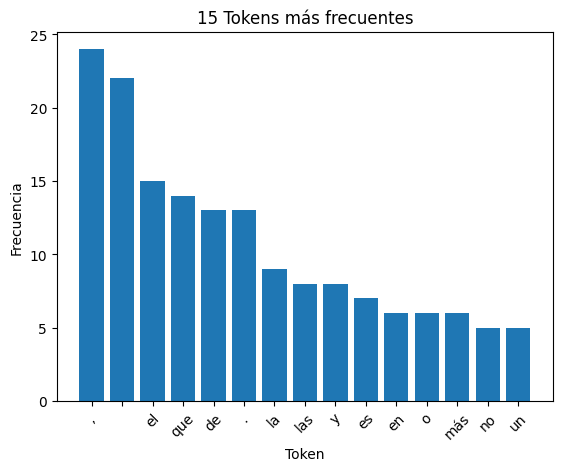

In [4]:
import matplotlib.pyplot as plt
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()


Histograma de los 15 tokens menos comunes

Hay 136 tokens que comparten esa característica


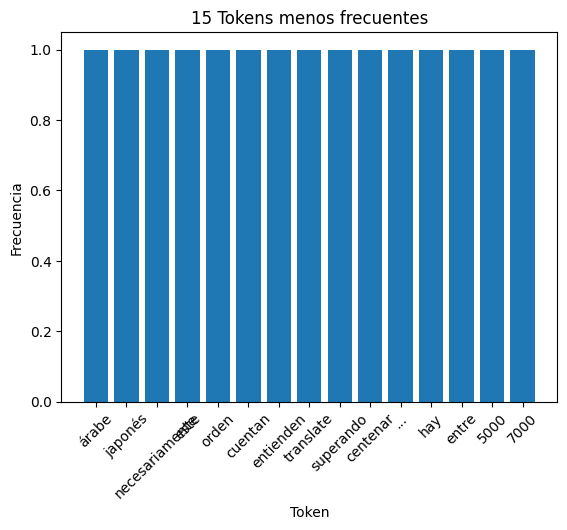

In [5]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()



Normalización de texto

In [20]:

from nltk.stem import SnowballStemmer
 
tokens_stopless=[token for token in doc if not token.is_stop]

stemmer=SnowballStemmer("spanish")

stems=[stemmer.stem(token.lemma_) for token in tokens_stopless]
pos_test=[(token.lemma_,token.pos_) for token in tokens_stopless]
print("Stemming")
print(stems)

lemmas_pos=[(token.lemma_,token.pos_) for token in nlp(" ".join(stems))]
print("\nLemmas y postagging con spacy y nltk con stemming")
print(lemmas_pos)
print("\nLemmas y postagging con solo nltk")
print(pos_test)

Stemming
['general', ',', 'pens', 'complej', 'lenguaj', '.', '\n', 'comport', 'intuit', 'utiliz', 'transmit', 'inform', 'signific', 'señal', '\n', 'semant', ',', 'palabr', ',', 'sign', 'imag', '.', 'facil', 'aprend', 'idiom', '\n', 'adolescent', 'comport', 'repet', 'entren', ',', '\n', 'camin', '.', 'asim', ',', 'idiom', 'conjunt', 'regl', 'estrict', ',', '\n', 'excepcion', 'innumer', ',', 'ejempl', ':', 'sustant', 'termin', '‘', '’', 'femenin', ',', '\n', 'cas', 'sustant', '‘', 'problem', '‘', '.', ',', 'human', 'result', 'natural', '\n', 'extrem', 'dificil', 'comput', ',', 'lidi', 'cantid', '\n', 'dat', 'estructur', ',', 'ausenci', 'regl', 'formal', 'falt', 'context', 'intencion', '\n', 'real', '.', 'aprendizaj', 'automat', 'inteligent', 'artificial', '(', 'ia', ')', 'gan', 'fuerz', 'llam', '\n', 'atencion', ',', 'puest', 'human', 'depend', 'sistem', 'informat', '\n', 'comunicar el', 'tare', '.', 'med', 'ia', 'volv', 'sofistic', ',', '\n', 'proces', 'lenguaj', 'natural', '(', 'pln', 

Usaremos solo los lemas y postagging generados por solo nltk